In [38]:
import simpy 
import numpy as np
import random
import matplotlib.pyplot as plt

In [123]:
"""
Bank renege example

Covers:

- Resources: Resource
- Condition events

Scenario:
  A counter with a random service time and customers who renege. Based on the
  program bank08.py from TheBank tutorial of SimPy 2. (KGM)

"""
import random

import simpy


RANDOM_SEED = 42
NEW_CUSTOMERS = 10000 # Total number of customers
LAMBD = 1/12
MU = 1/11

waiting_times = []
service_times = []

def source(env, number, lambd, mu, counter):
    """Source generates customers randomly"""
    t0 = np.random.exponential(1/lambd) # Arrival time of first customer
    yield env.timeout(t0)

    for i in range(number):
        c = customer(env, 'Customer%02d' % i, counter, mu)
        env.process(c)

        t = np.random.exponential(1/lambd)
        yield env.timeout(t)
   


def customer(env, name, counter, mu):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    print('%7.4f %s: Here I am' % (arrive, name))

    with counter.request() as req: 
        yield req
        wait = env.now - arrive
        waiting_times.append(wait)
        print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))
        service_time = np.random.exponential(1/mu)
        service_times.append(service_time)

        yield env.timeout(service_time)
        print('%7.4f %s: Finished' % (env.now, name))
    
    if len(waiting_times) == 5:
      print(waiting_times)
        


In [124]:

random.seed(RANDOM_SEED)
def mmc_sim(new_customers, lambd, mu, capacity):
  waiting_times = []
  service_times = []
  env = simpy.Environment()

  # Start processes and run
  counter = simpy.Resource(env, capacity=capacity)
  env.process(source(env, new_customers, lambd, mu, counter))
  env.run()
  
  return waiting_times, service_times


In [121]:
l_wt_mm1 = []
lambd_1 = 1/12
mu = 1/10


for i in range(101): 
    waiting_times, service_times = mmc_sim(100, 1/12, 1/11, 1)

    l_wt_mm1.append(waiting_times)

l_wt_mm1 = l_wt_mm1[:-1]

l_wt_mm2 = []
for i in range(101):
    waiting_times, service_times = mmc_sim(100, 2/12, 1/11, 1)

    l_wt_mm2.append(waiting_times)

l_wt_mm2 = l_wt_mm2[:-1]

mm1_means = np.mean(l_wt_mm1)
mm2_means = np.mean(l_wt_mm2)

mm1_std = np.std(l_wt_mm1)
mm2_std = np.std(l_wt_mm2)



 0.5475 Customer00: Here I am
 0.5475 Customer00: Waited  0.000
 6.5981 Customer00: Finished
15.6742 Customer01: Here I am
15.6742 Customer01: Waited  0.000
26.2023 Customer02: Here I am
29.2747 Customer01: Finished
29.2747 Customer02: Waited  3.072
34.3631 Customer02: Finished
52.1661 Customer03: Here I am
52.1661 Customer03: Waited  0.000
54.2570 Customer03: Finished
63.8120 Customer04: Here I am
63.8120 Customer04: Waited  0.000
64.3236 Customer05: Here I am
67.8619 Customer06: Here I am
72.4805 Customer07: Here I am
73.9183 Customer08: Here I am
77.2876 Customer04: Finished
[0.0, 0.0, 3.0724680517743224, 0.0, 0.0]
77.2876 Customer05: Waited 12.964
82.0526 Customer05: Finished
82.0526 Customer06: Waited 14.191
85.9493 Customer06: Finished
85.9493 Customer07: Waited 13.469
86.2873 Customer07: Finished
86.2873 Customer08: Waited 12.369
86.4592 Customer09: Here I am
89.0203 Customer10: Here I am
90.0296 Customer08: Finished
90.0296 Customer09: Waited  3.570
99.8137 Customer09: Finished

In [122]:
print(np.mean(mm1_means))
print(np.mean(mm2_means))

52.22777284378135
252.78897088181031


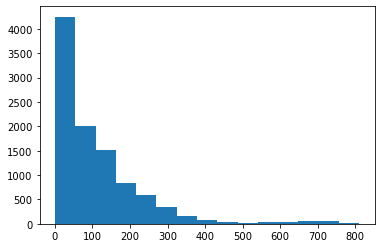

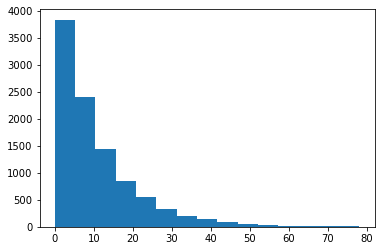

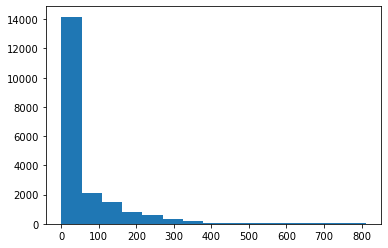

In [57]:
sojourn_time = waiting_times + service_times
plt.hist(waiting_times, bins = 15)
plt.show()
plt.hist(service_times, bins = 15)
plt.show()
plt.hist(sojourn_time, bins = 15)
plt.show()

In [58]:
rho = LAMBD/MU
print(f'Theoretical mean waiting time = {(rho/MU)/(1/rho)}')
print(f'Empirical mean waiting time = {np.mean(waiting_times)}')

Theoretical mean waiting time = 9.243055555555554
Empirical mean waiting time = 107.85546388128239
